In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_ts=pd.read_csv("E:\AirPassengers.csv")
df_ts.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df_ts.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df_ts['Month']=pd.to_datetime(df_ts['Month'])

In [9]:
df_ts.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<AxesSubplot:xlabel='Month'>

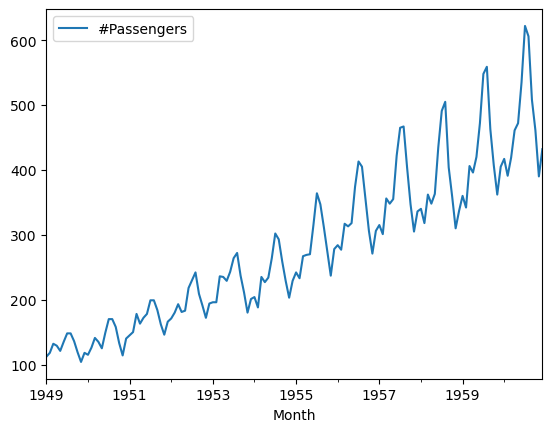

In [14]:
df_ts.set_index('Month',inplace=True)
df_ts.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(df_ts['#Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
def adf_stationary_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("We accept the null Hypothesis and conclude-Data is non-stationary ")

In [19]:
adf_stationary_test(df_ts['#Passengers'])

ADF Statistics: 0.8153688792060543
p- value: 0.9918802434376411
We accept the null Hypothesis and conclude-Data is non-stationary 


In [20]:
df_ts['Passengers First Difference']=df_ts['#Passengers']-df_ts['#Passengers'].shift(1)

In [21]:
df_ts.head()

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [22]:
adf_stationary_test(df_ts['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value: 0.054213290283824954
We accept the null Hypothesis and conclude-Data is non-stationary 


In [23]:
df_ts['Passengers Second Difference']=df_ts['Passengers First Difference']-df_ts['Passengers First Difference'].shift(1)

In [24]:
adf_stationary_test(df_ts['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468488
p- value: 2.7328918500143186e-29
Reject the null hypothesis. Data is stationary


In [32]:
df_ts['Passengers 12 Difference']=df_ts['#Passengers']-df_ts['#Passengers'].shift(12)
df_ts.head(30)

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [27]:
adf_stationary_test(df_ts['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
Reject the null hypothesis. Data is stationary


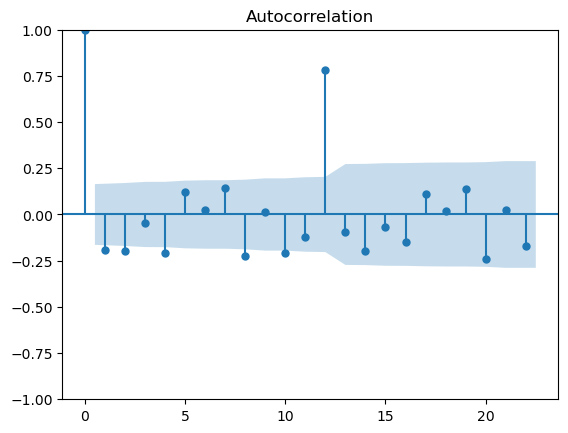

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_ts["Passengers Second Difference"].dropna())

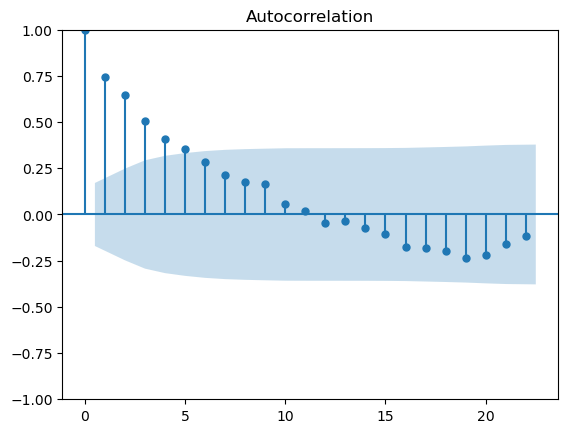

In [33]:

acf_seasonal = plot_acf(df_ts["Passengers 12 Difference"].dropna())

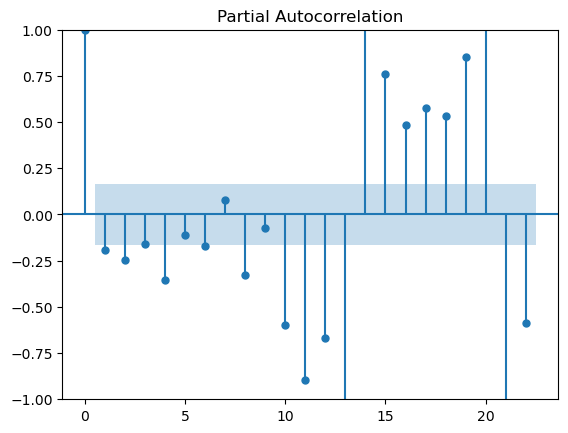

In [34]:
result = plot_pacf(df_ts["Passengers Second Difference"].dropna())

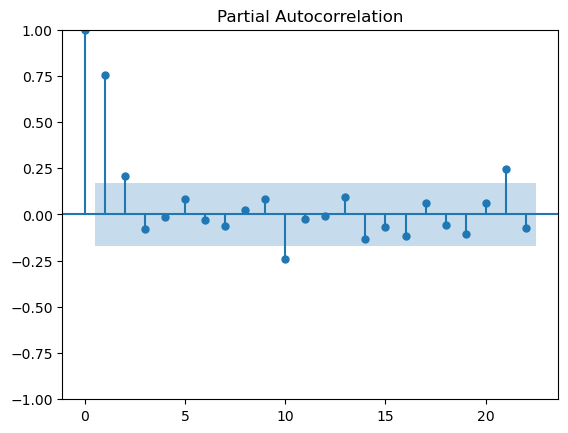

In [35]:
pacf_seasonal = plot_pacf(df_ts["Passengers 12 Difference"].dropna())

In [36]:
df_ts

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [37]:
from datetime import datetime,timedelta
train_end=datetime(1955,12,1)
test_end=datetime(1960,12,1)

In [38]:
train_data=df_ts[:train_end]
test_data=df_ts[train_end+timedelta(days=30):test_end]

In [39]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [40]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))

In [44]:
model_SARIMA_fit=model_SARIMA.fit()

In [45]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(2, 0, 5)x(0, 1, [], 12)   Log Likelihood                -266.318
Date:                             Tue, 27 Feb 2024   AIC                            548.636
Time:                                     22:07:04   BIC                            566.850
Sample:                                 01-01-1949   HQIC                           555.887
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3147      1.446      0.909      0.363      -1.520       4.149
ar.L2         -0.3310      1.423     -0.233      0.816      -3.120       2.458
ma.L1         -0.5813      1.435     -0.405      0.685      -3.393       2.231
ma.L2          0.1519      0.425      0.358      0.721      -0.680       0.984
ma.L3         -0.2934      0.221     -1.325      0.185      -0.727       0.141
ma.L4          0.1245      0.411      0.303      0.762      -0.681       0.930
ma.L5          0.0729      0.174      0.420      0.675      -0.268       0.413
sigma2        92.1008     17.258      5.337      0.000      58.275     125.926
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               2.13   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [47]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,1),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

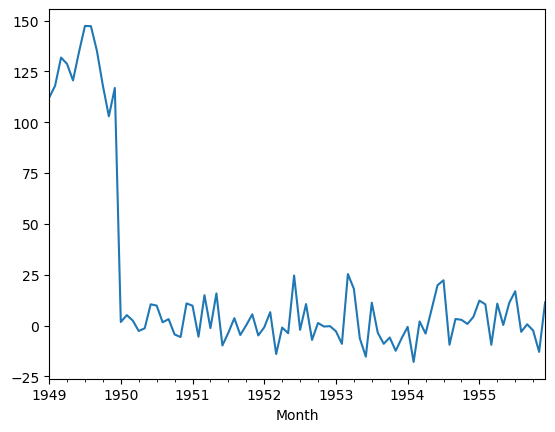

In [48]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

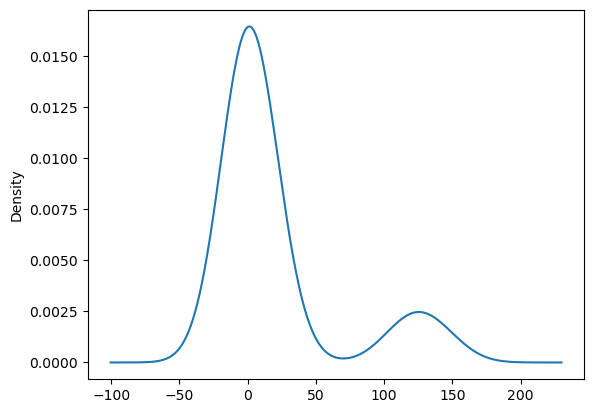

In [49]:
model_SARIMA_fit.resid.plot(kind='kde')

In [50]:
test_data['Predicted_SARIMA']=pred_Sarima

In [51]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_SARIMA
Month,,,,,
1956-01-01,284,6.0,-35.0,42.0,NaN
1956-02-01,277,-7.0,-13.0,44.0,NaN
1956-03-01,317,40.0,47.0,50.0,NaN
1956-04-01,313,-4.0,-44.0,44.0,NaN
1956-05-01,318,5.0,9.0,48.0,NaN
1956-06-01,374,56.0,51.0,59.0,355.459659
1956-07-01,413,39.0,-17.0,49.0,403.528117
1956-08-01,405,-8.0,-47.0,58.0,385.576163
1956-09-01,355,-50.0,-42.0,43.0,349.632952


<AxesSubplot:xlabel='Month'>

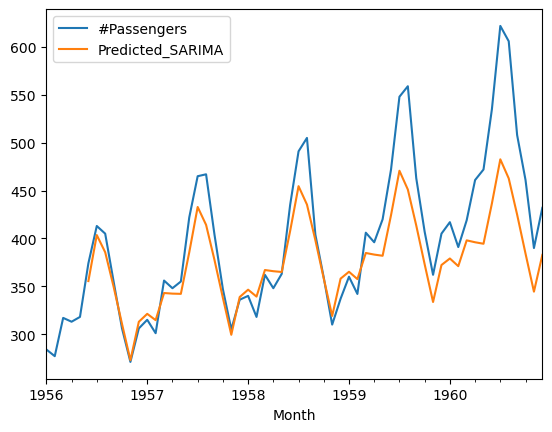

In [53]:
test_data[['#Passengers','Predicted_SARIMA']].plot()